# ECE 351 - Lab #8
### Collin Heist
#### Fourier Series Approximation of a Square Wave

## Introduction
The purpose of this lab is to practice using the Fourier series to approximate periodic signals in the time domain. In particular, we'll be approximating a square wave.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Color list for multiple lines on each subplot
colors = ["red", "blue", "green", "gray", "purple", "orange"]
step_size = 0.005

# Generic Function to create a plot
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1, size=(18, 14)):
    plt.figure(figsize=size, dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2], alpha=0.70)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='lower right')
    
    plt.show()

## Tasks
1. $x(t)$ is an odd function. This is easily observed in the graphical depiction of $x(t)$, as for one time value, take $\frac{T}{4}$, the value of $x(t)$ at $\frac{T}{4}$ is equal to the negative of the function's value at $\frac{-T}{4}$ (1 vs. -1). This is the defintion of an odd function, that $f(-x)=-f(x)$.
2. The  equations for $a_k$ and $b_k$ that I found in the prelab are:

$$a_k=0$$

$$b_k=\frac{2}{k\pi}(1-cos(k\pi))$$

In [50]:
def a(k):
    return 0

def b(k): # To prevent NaN division by 0, add a conditional to return 0
    return (2 / (k * np.pi)) * (1 - np.cos(k * np.pi))

print ("a_0: %f\na_1: %f\nb_1: %f\nb_2: %f\nb_3: %f" % (a(0), a(1), b(1), b(2), b(3)))

a_0: 0.000000
a_1: 0.000000
b_1: 1.273240
b_2: 0.000000
b_3: 0.424413


2. I expect all values of a, so $a_2, a_3, ..., a_n$ to be zero. This is because the function is odd, resulting in the integral evaluation of $a_k$ to become zero, as the net area between $\frac{-T}{2}$ and $\frac{T}{2}$ is zero.

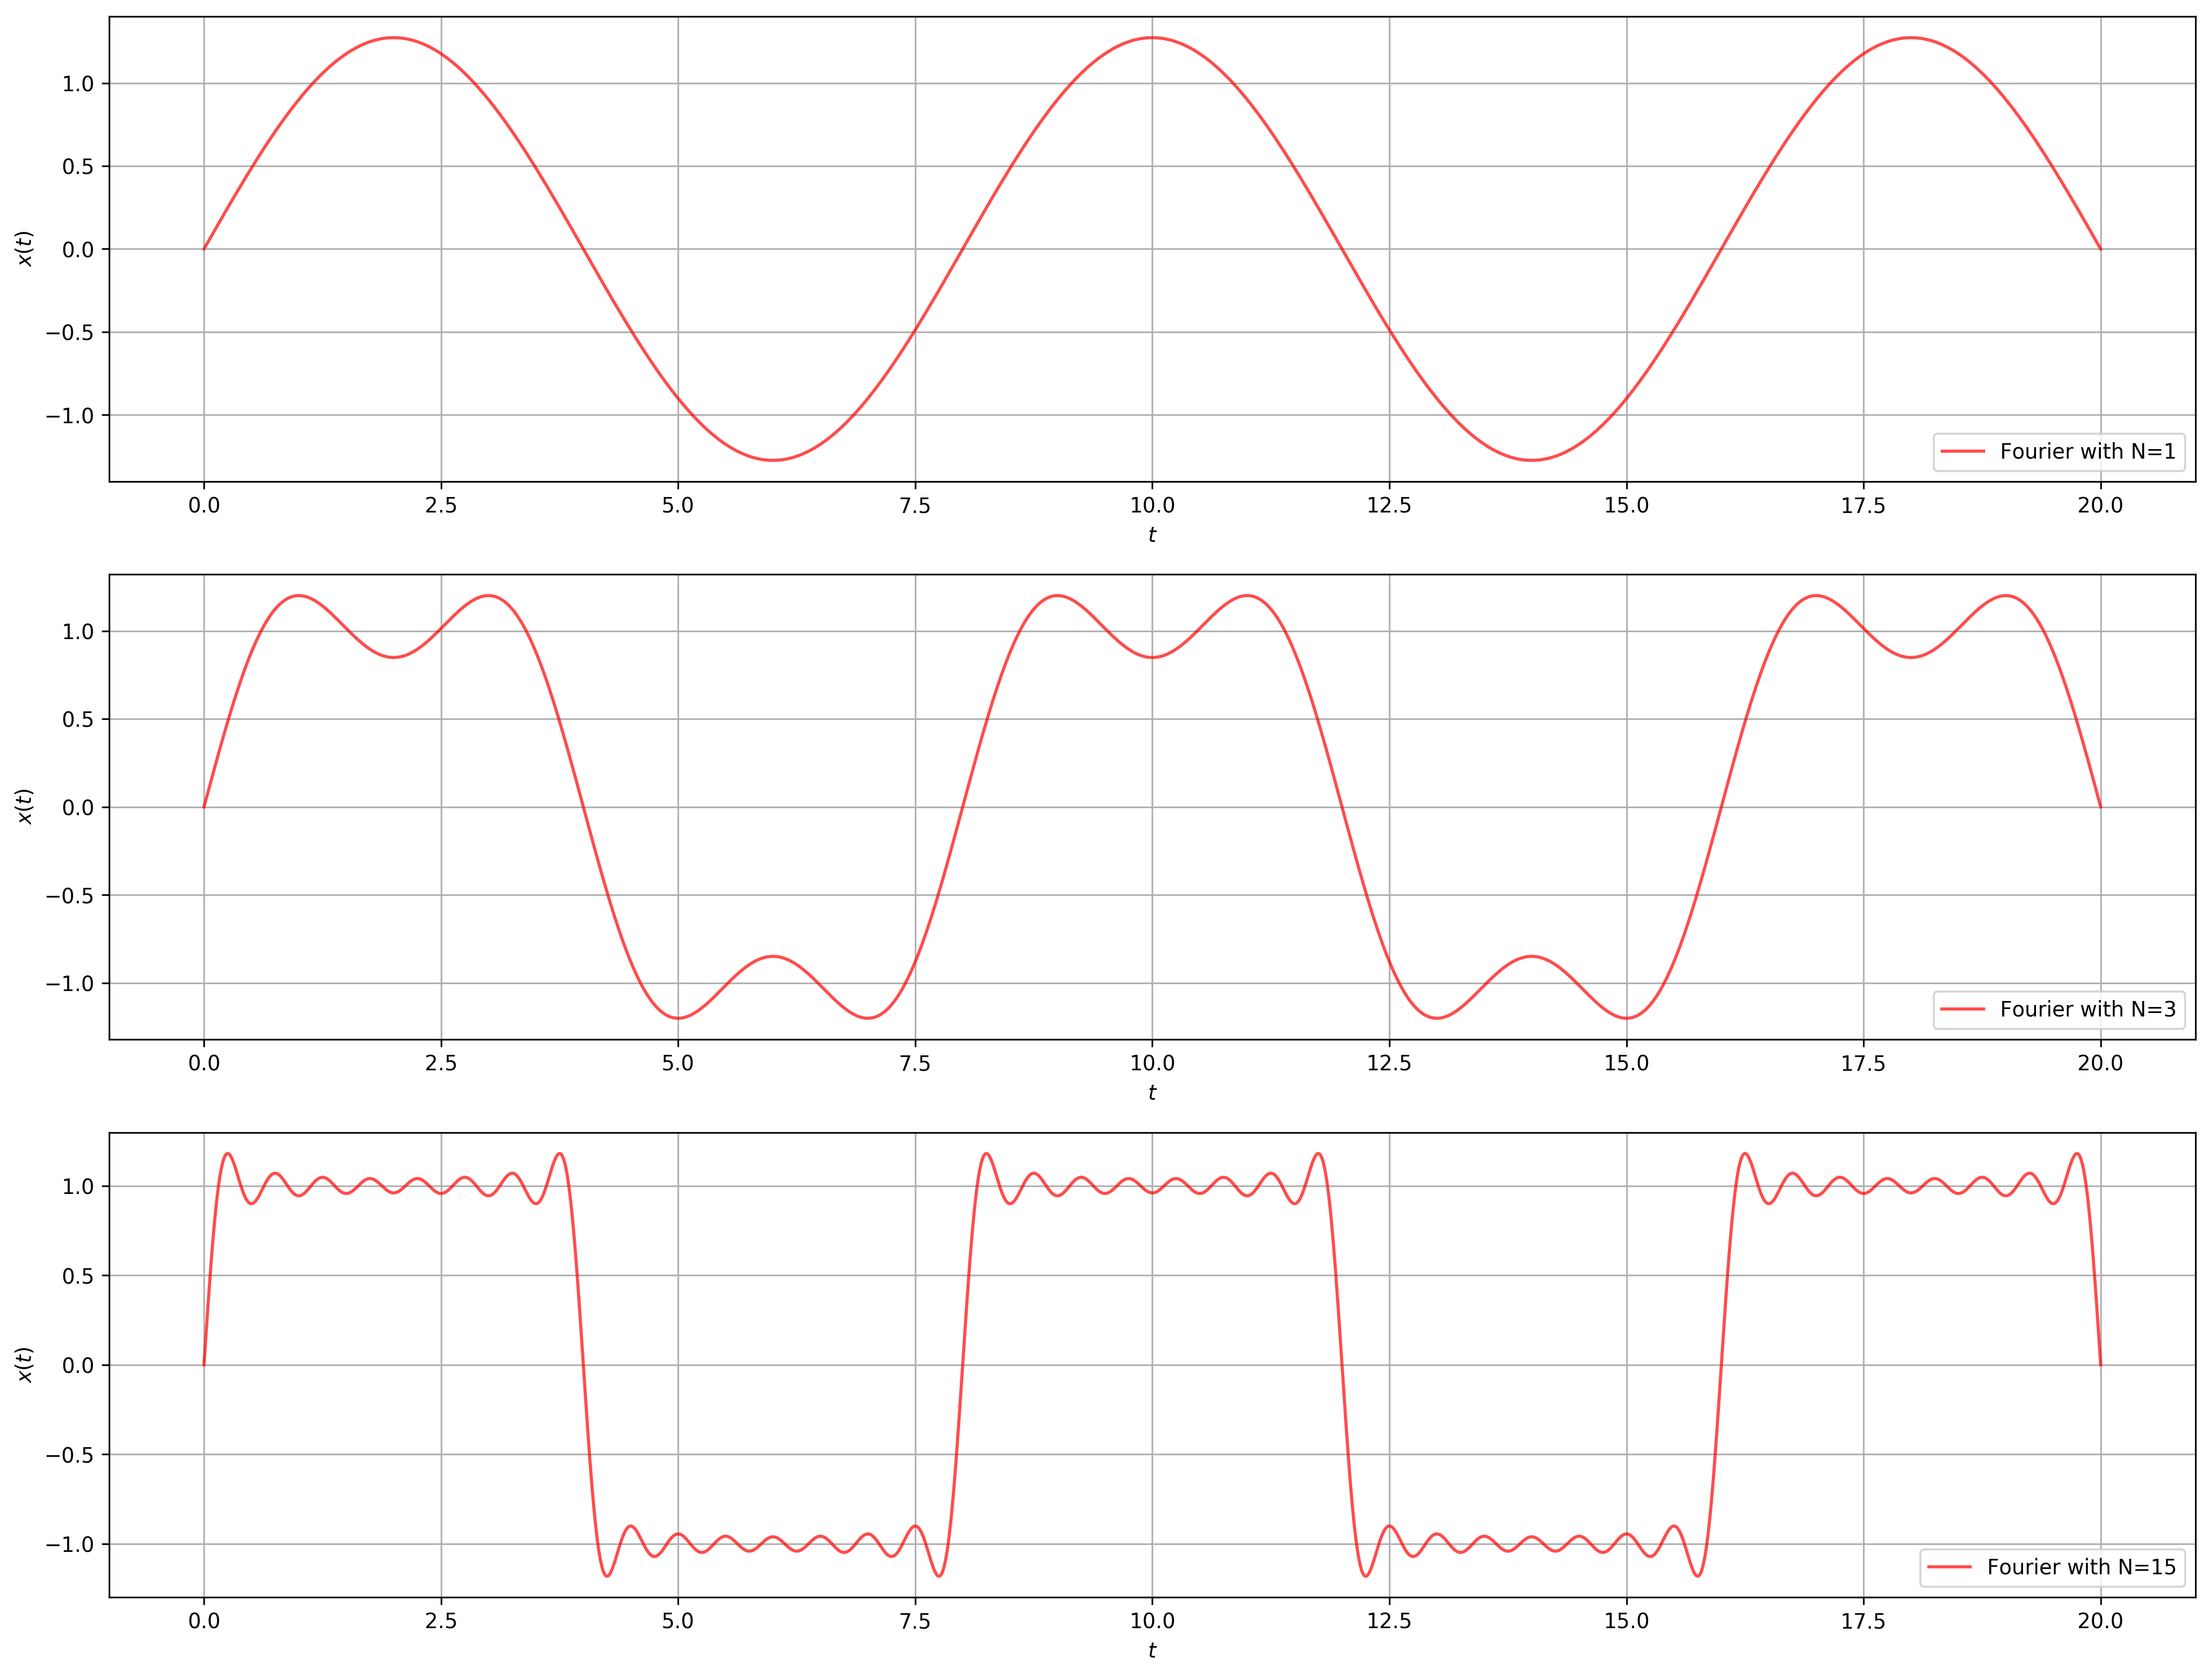

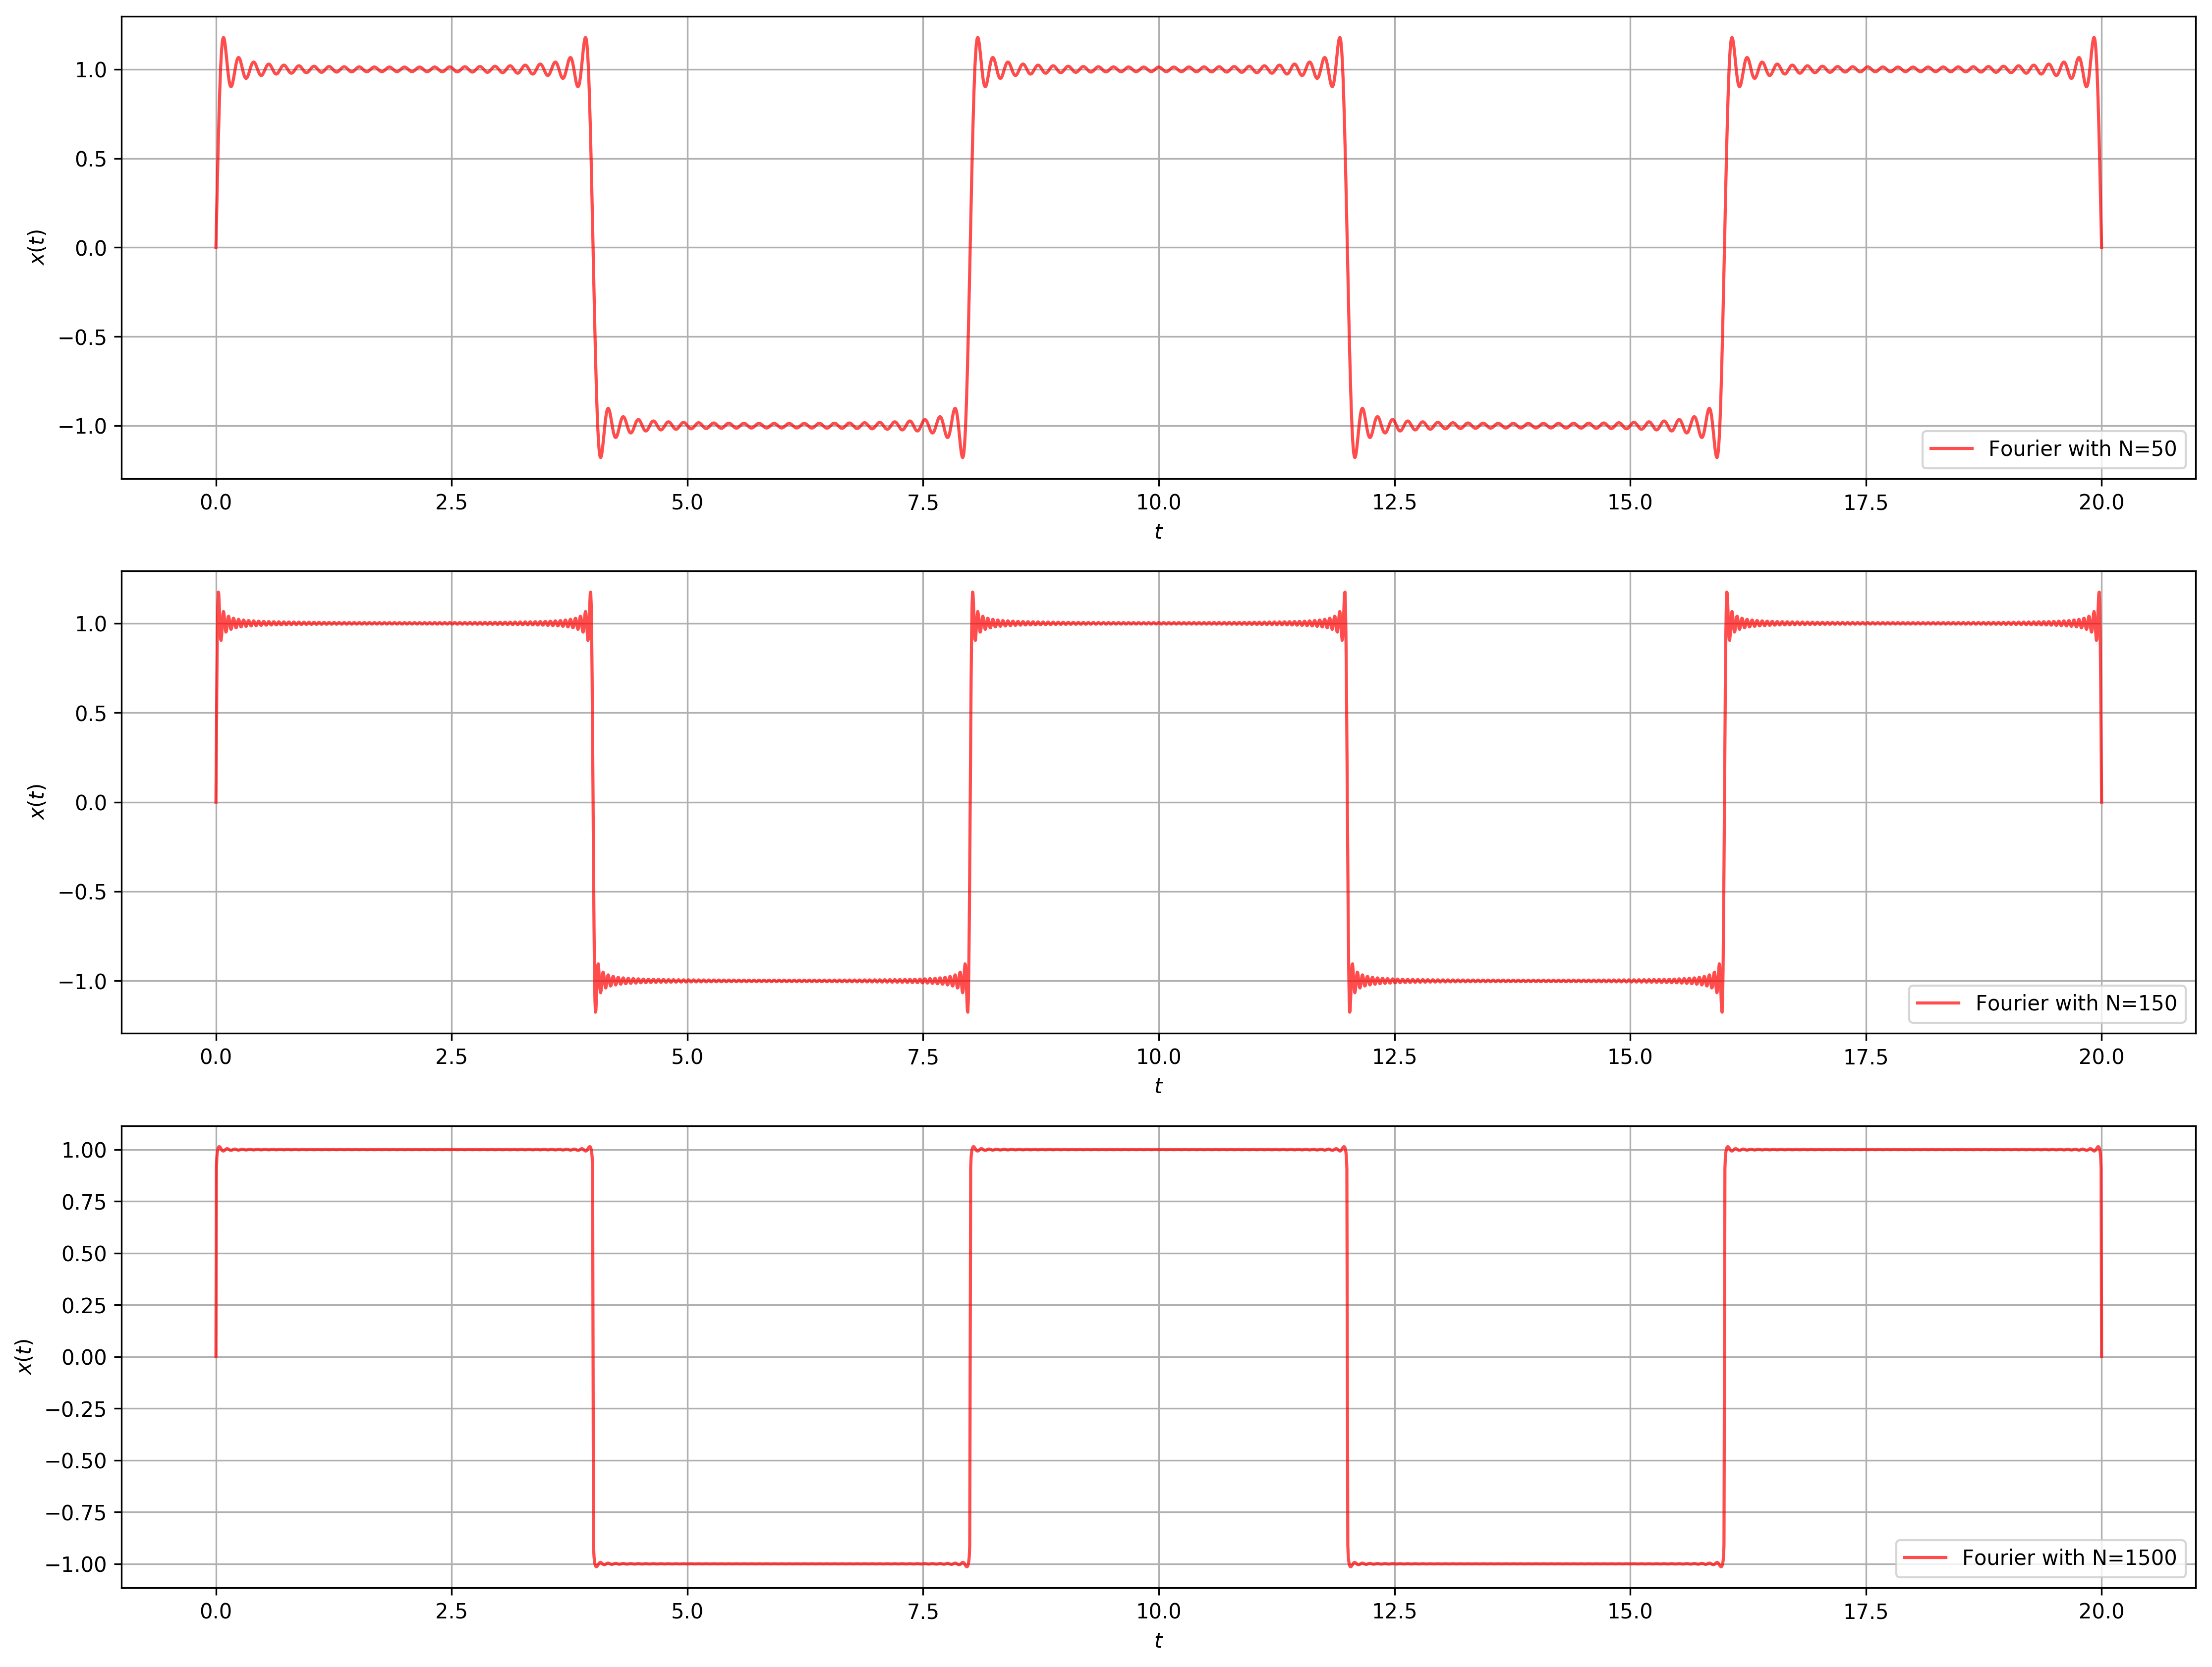

In [62]:
def fourier(t, period, a, b, N):
    approx = [a(k)*np.cos(2*np.pi*k*t/period) + 
              b(k)*np.sin(2*np.pi*k*t/period) for k in np.arange(1, N+0.1)]
    return (0.5 * a(0) + np.sum(approx, axis=0))

t = np.arange(0, 20 + step_size, step_size)
create_plot([t, t, t],
            [(fourier(t, 8, a, b, 1), ),
             (fourier(t, 8, a, b, 3), ),
             (fourier(t, 8, a, b, 15), )],
            ["$t$", "$t$", "$t$"],
            ["$x(t)$", "$x(t)$", "$x(t)$"],
            [("Fourier with N=1", ), ("Fourier with N=3", ), ("Fourier with N=15", )], 3)
create_plot([t, t, t],
            [(fourier(t, 8, a, b, 50), ),
             (fourier(t, 8, a, b, 150), ),
             (fourier(t, 8, a, b, 1500), )],
            ["$t$", "$t$", "$t$"],
            ["$x(t)$", "$x(t)$", "$x(t)$"],
            [("Fourier with N=50", ), ("Fourier with N=150", ), ("Fourier with N=1500", )], 3)

## Questions
1. As the value of N increases the approximation of the function more closely approximates the square wave. For very small values of N, the approximation resembles the general shape of the square wave, but has quite a few artifacts (like the peaks at the transitions).
2. For higher values of N (and thus k), smaller and smaller amplitudes of the sinusiodal items are added on top of eachother. This results in a higher 'frequency' of oscillation during the non-transition periods of the square wave, causing the approximation to appear more 'flat' at these periods, and the transitions themselves to be more 'instantaneous'
3. This lab was very clear and easy to follow / understand. I do think the wording on question 2 of the tasks is a bit unclear, as our derivation for $a_k$ in the prelab clearly shows that all a terms are 0, leaving the question itself to be a bit of a waste of time (or so it seems). I do think the _Why?_ is an important question, but it seems silly to hypothesize on the values of $a_n$.

## Conclusion
This lab was very effective at helping me understand the Fourier Series and its use in approximating a periodic function. Although the specific mathematical reasoning for this series is a bit beyond me, having to visualize and derive the values for $a_k$ and $b_k$ made the understanding of those respective coefficients very intuitive. I am somewhat surprised by how large N needed to be in order to achieve an approximation very close to the initial square wave.